<a href="https://colab.research.google.com/github/RaianaSeixas/0_paper_one_revisited/blob/main/CEC14/CFRANNK-3K/C_Frannk_F20_npar150%3Bit%3D2000cec2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz
import Go2Ann
from pandas import read_csv

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 632, done.
remote: Counting objects: 100% (318/318), done.
remote: Compressing objects: 100% (192/192), done.
remote: Total 632 (delta 200), reused 205 (delta 126), pack-reused 314
Receiving objects: 100% (632/632), 392.08 KiB | 7.54 MiB/s, done.
Resolving deltas: 100% (381/381), done.
/content/optim_raianars_Insight


In [2]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 277 (delta 83), reused 142 (delta 82), pack-reused 129
Receiving objects: 100% (277/277), 667.30 KiB | 10.94 MiB/s, done.
Resolving deltas: 100% (155/155), done.
/content/optim_raianars_Insight/Raianars_paper_One


In [3]:
#import Go2Ann
#import de_soma_Insight
#import de_bounds_matriz
#import Function
import Go2MinMax
from AvaliaX import AvaliaX
#from Function import FUN
#from Function import Function.FUN
#from Function import Function.Fun
#from Function import Function
from GeraIndices import GeraIndices
import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=2000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=150
mut=0.5
crossp=0.5

#fator = 1.0/3.0; 
Fi=mut;CRi=crossp;# para impressão
fator = 1.0/3.0; 
mut2=0.5;crossp2=0.5;mut3=0.75;crossp3=0.25;mut4=0.25;crossp4=0.25;


In [4]:
def load_shift_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values.reshape((-1))

def load_matrix_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values

In [5]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 632, done.
remote: Counting objects: 100% (318/318), done.
remote: Compressing objects: 100% (192/192), done.
remote: Total 632 (delta 200), reused 205 (delta 126), pack-reused 314
Receiving objects: 100% (632/632), 392.08 KiB | 7.69 MiB/s, done.
Resolving deltas: 100% (381/381), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight


In [6]:
#!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
#%cd Raianars_paper_One

!git clone https://github.com/ucfilho/Raianars_Routines #clonar do Github
%cd Raianars_Routines

Cloning into 'Raianars_Routines'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 77 (delta 23), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (77/77), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines


In [7]:
!git clone https://github.com/ucfilho/functions_cec2014_data
%cd functions_cec2014_data
import F1_to_F27_cec2014_zero_to_hero
import cec2014_names
import cec2014_shift_rotate

Cloning into 'functions_cec2014_data'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 300 (delta 2), reused 0 (delta 0), pack-reused 294
Receiving objects: 100% (300/300), 465.31 KiB | 6.04 MiB/s, done.
Resolving deltas: 100% (181/181), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data


In [8]:
function_select = 'F20'

problem_size = 30 # possibles 2, 10, 20, 30, 50, 100

In [9]:
dim = problem_size 

In [10]:
if function_select == 'F28':
  hybrid_choice = 'F15'


In [11]:
!pip install --upgrade --no-cache-dir gdown

In [12]:
# !gdown --id 1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz
# https://drive.google.com/file/d/1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz/view?usp=sharing
!gdown --id 1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz
To: /content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/cec2014.zip
100% 36.1M/36.1M [00:00<00:00, 192MB/s]


In [13]:
import zipfile
file_name = zipfile.ZipFile('cec2014.zip', 'r')
file_name.extractall()

In [14]:

Function_CEC2014 =function_select + "_" + cec2014_names.NamesFunctions()[function_select]+"_D_"+str(problem_size)

f_matrix = "M_"+function_select[1:]+"_D"+str(problem_size) + ".txt"
shift_data_file="shift_data_"+function_select[1:]+".txt"
shift_data = load_shift_data__(shift_data_file)[:problem_size]
matrix = load_matrix_data__(f_matrix)
f_shuffle = "shuffle_data_"+function_select[1:]+"_D"+str(problem_size) + ".txt"
shuffle = (load_shift_data__(f_shuffle)[:problem_size] - np.ones(problem_size)).astype(int)

f12_hgbat__ = F1_to_F27_cec2014_zero_to_hero.f12_hgbat__
f3_discus__ = F1_to_F27_cec2014_zero_to_hero.f3_discus__
f13_expanded_griewank__ = F1_to_F27_cec2014_zero_to_hero.f13_expanded_griewank__
f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__

f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__


def F20(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
    problem_size = len(solution)
    p = np.array([0.2, 0.2, 0.3, 0.3])
    n1 = int(np.ceil(p[0] * problem_size))
    n2 = int(np.ceil(p[1] * problem_size))
    n3 = int(np.ceil(p[2] * problem_size))

    idx1 = shuffle[:n1]
    idx2 = shuffle[n1:(n1 + n2)]
    idx3 = shuffle[(n1 + n2):(n1 + n2 + n3)]
    idx4 = shuffle[n1 + n2 + n3:]
    mz = np.dot(solution - shift_data, matrix)
    return f12_hgbat__(mz[idx1]) + f3_discus__(mz[idx2]) + f13_expanded_griewank__(mz[idx3]) + f8_rastrigin__(mz[idx4])# + bias

In [15]:
def load_shift_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values.reshape((-1))

def load_matrix_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values

In [16]:
if function_select == 'F28':
  Function = F28
if function_select == 'F25':
  Function = F25
if function_select == 'F22':
  Function = F22
if function_select == 'F20':
  Function = F20
  
fobj=Function
Fun = Function

In [17]:
SUPPORT_DIMENSION = [2, 10, 20, 30, 50, 100]
SUPPORT_DIMENSION_2 = [10, 20, 30, 50, 100]

#def Fun(solution,shift_data=shift_data_a, matrix=matrix_a, shuffle):#, bias=F_bias):
def CEC2014(solution, shift_data ,  matrix, shuffle):#, bias=F_bias):
  if(type_fun == 'shift_rotate'):
    z = Shift_Rotate(solution , shift_data , matrix,shuffle)
    result = Function(z) + F_bias
  elif(type_fun =='hybrid'): # F17 to F22
    z = Shift_Rotate(solution , shift_data , matrix,shuffle)
    result = z + F_bias
 
  return result

In [18]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 277 (delta 83), reused 142 (delta 82), pack-reused 129
Receiving objects: 100% (277/277), 667.30 KiB | 11.31 MiB/s, done.
Resolving deltas: 100% (155/155), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One


In [19]:
MAX=np.repeat(100,dim)
MIN=np.repeat(-100,dim)

bounds=[]
for k in range(len(MAX)):
  bounds.append((MIN[k],MAX[k]))

In [20]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20
Unpacking objects: 100% (20/20), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One/ANN_read_matrix


In [21]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [22]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [23]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [24]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [25]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [26]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [27]:
##################################### 

TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

#dimensions=len(MAX)
dimensions=dim
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


PAR=dim


MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
NPAR1=int(fator*NPAR);
NPAR2=int((NPAR-NPAR1)/3);
NPAR3=int((NPAR-NPAR1)/3);
NPAR4=int((NPAR-NPAR1)/3);
NPAR1 = NPAR-3*NPAR2
print('frac=',fator);
print('Npar1=',NPAR1);
print('Npar2=',NPAR2);
print('Npar3=',NPAR3);
print('Npar4=',NPAR4);
print('Npar=',NPAR)

cols=dim

X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
for i in range(NPAR1):
  for j in range(cols):
    r=np.random.random()
    X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
for i in range(NPAR2):
  for j in range(cols):
    r=np.random.random()
    X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

X3=np.zeros((NPAR3,cols)) # X1 is Frannk population
for i in range(NPAR3):
  for j in range(cols):
    r=np.random.random()
    X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
for i in range(NPAR4):
  for j in range(cols):
    r=np.random.random()
    X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  #bounds=[(p, p)] * PONTOS


frac= 0.3333333333333333
Npar1= 51
Npar2= 33
Npar3= 33
Npar4= 33
Npar= 150


In [28]:

start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for iii in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)


    X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
    for i in range(NPAR1):
      for j in range(cols):
        r=np.random.random()
        X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
        
    X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
    for i in range(NPAR2):
      for j in range(cols):
        r=np.random.random()
        X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X3=np.zeros((NPAR3,cols)) # X2 is population DE (default DE)
    for i in range(NPAR3):
      for j in range(cols):
        r=np.random.random()
        X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
    for i in range(NPAR4):
      for j in range(cols):
        r=np.random.random()
        X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind, shift_data , matrix, shuffle) for ind in X1])
    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X1,Fitness)
    nrow,ncol=X1.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo

    Fuma = f1_elliptic__  # Fuma era Fun
  
    MAT_INDo=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fuma)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1
    

    
    for k in range(ITE):



      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut2, crossp2,NPAR2, its,fobj,X2)
      X3,BEST3,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut3, crossp3,NPAR3, its,fobj,X3)
      X4,BEST4,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut4, crossp4,NPAR4, its,fobj,X4)
      
      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)

      MAT_IND=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST1);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]
      X1[0,:] = BEST2;X1[1,:] = BEST3; X1[2,:] = BEST4;X1[NPAR1-1,:] = BEST1;
      X2[0,:] = BEST1;X2[1,:] = BEST3;X2[2,:] = BEST4;X2[NPAR2-1,:] = BEST2;
      X3[0,:] = BEST1;X3[1,:] = BEST2;X3[2,:] = BEST4;X3[NPAR3-1,:] = BEST3;
      X4[0,:] = BEST1;X4[1,:] = BEST2;X4[2,:] = BEST3;X4[NPAR4-1,:] = BEST4;
    print('k=',iii,'time=',(time.time()-start_time)/60, 'FO=',FOBEST)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

k= 0 time= 4.507486108938853 FO= 4003.0716684628896
k= 1 time= 8.652565276622772 FO= 9020.406960536504
k= 2 time= 12.806725029150645 FO= 16477.34719061063
k= 3 time= 16.97734934091568 FO= 5108.995357179426
k= 4 time= 21.139119108517963 FO= 868.8843030531646
k= 5 time= 25.274355347951253 FO= 8441.013917655899
k= 6 time= 29.410948932170868 FO= 17371.254749369215
k= 7 time= 33.555823747317 FO= 5277.224409016371
k= 8 time= 37.753722151120506 FO= 75.54168276702734
k= 9 time= 41.892104824384056 FO= 2777.0154107938665
k= 10 time= 46.02015385627747 FO= 6592.86125657363
k= 11 time= 50.17145560979843 FO= 1103.8524997541235
k= 12 time= 54.310136663913724 FO= 6757.578525816332
k= 13 time= 58.43345473210017 FO= 7464.560340465276
k= 14 time= 62.5453253308932 FO= 10210.461421978747
k= 15 time= 66.66218746503195 FO= 1673.517912836031
k= 16 time= 70.78469244241714 FO= 11421.790488850653
k= 17 time= 74.93548291524252 FO= 206.78216407315867
k= 18 time= 79.03953299919765 FO= 1874.276242339254
k= 19 time= 

In [29]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [30]:
pd.set_option('display.max_columns', 30)  
print(df)

      DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X    NP  \
0           311.957574     1.020168   0.00017         1.0      2.0  51.0   
1           309.761964     1.012987   0.00034         2.0      2.0  51.0   
2           313.062135     1.023780   0.00051         0.0      0.0  51.0   
3           307.754270     1.006422   0.00068         1.0      2.0  51.0   
4           310.127467     1.014183   0.00085         1.0      2.0  51.0   
...                ...          ...       ...         ...      ...   ...   
1995        122.757527     0.401443   0.33932         1.0      1.0  51.0   
1996        122.757451     0.401443   0.33949         1.0      1.0  51.0   
1997        122.757412     0.401443   0.33966         1.0      1.0  51.0   
1998        122.757438     0.401443   0.33983         1.0      1.0  51.0   
1999        122.757447     0.401443   0.34000         0.0      0.0  51.0   

            Fo           CRo          fmin          fmax  AD_fmin  AD_fmax  \
0     0.5

Text(0, 0.5, 'CR')

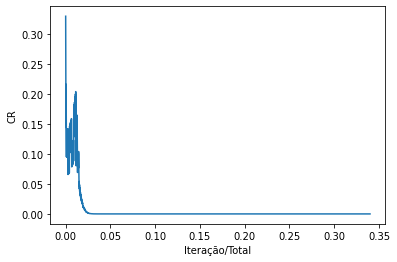

In [31]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

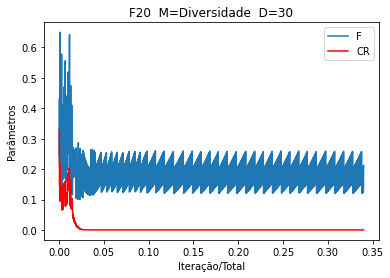

In [32]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'F20_Diversidade_D=30')

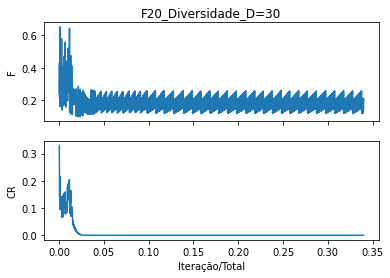

In [33]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [34]:
nome='SUB'+'_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('MCS-FRANNK','Fator F/DE= %.2f' %(fator),'NPAR=',NPAR,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1],'STD __:',STD)
print('MIN __:',MINFO, 'MAX__: ',MAXFO)
print(MEAN[-1])
print(STD)
print(MINFO)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

MCS-FRANNK Fator F/DE= 0.33 NPAR= 150 Iterações= 2000 Dim= 30 Min/Max= -100 / 100 _ F20
SUB_Fo-0.5_CRo-0.5_D-30_Interv-2000 

MÉDIA:  5849.062728750395 STD __: 4966.628079747229
MIN __: 75.54168276702734 MAX__:  18097.180716880193
5849.062728750395
4966.628079747229
75.54168276702734
Tempo Médio= 249.242 segundos ---
50 Rodadas

BEST:  [-48.58291994  43.33529989 -25.96021924 -12.74214157 -54.01545076
  50.41886327  18.38402229  37.81759309  48.11614818 -69.4108191
  72.11214087  -0.46271575  40.17502807  39.16493199  49.63069375
 -54.51745531  -4.96560392  19.12491913  67.99807646  51.80672405
  65.07361811  12.70740223  13.50860947  56.71012706 -76.94457395
  61.45526011 -17.0076292  -75.128475    39.20764718 -55.69257219
  75.54168277]
